## Impostant Parameters of Aggolomerative Clustering

#### n_clusters : by default 2,may not be specified if distance threshold is given
#### affinity : what distance metric will be used;Precomputed means square matrix
#### linkage : {"ward","complete","average","single"},default = "ward"
#### distance_threshold float,default = None

##### on merging clusters,SSE will increase but we choose that linkage which provides minimum SSE increase

## How to fit Aggolomerative Clustering

In [2]:
from sklearn.cluster import AgglomerativeClustering

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [7]:
colors = ['royalblue','red','deeppink','maroon','tan','forestgreen','olive','goldenrod','black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

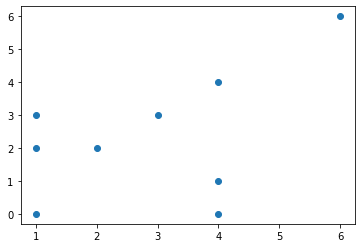

In [8]:
X = np.array([[1,2],[1,3],[2,2],[3,3],[1,0],[4,1],[4,4],[4,0],[6,6]])
plt.scatter(X[:,0],X[:,1])

In [9]:
model = AgglomerativeClustering(linkage="single")
model = model.fit(X)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

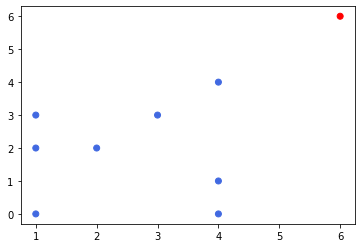

In [10]:
plt.scatter(X[:,0],X[:,1],c=vectorizer(model.labels_))

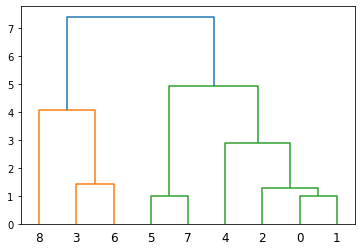

In [11]:
from scipy.cluster.hierarchy import dendrogram,linkage
from matplotlib import pyplot as plt
Z= linkage(X,'ward')
dn = dendrogram(Z)
plt.show()

In [12]:
# dendrogram tells 0 and 1 are near,forming cluster they form cluster with 2 

In [18]:
def clust_plot(X,c):
    model = AgglomerativeClustering(linkage="single",n_clusters=c)
    model =  model.fit(X)
    ymin = model.labels_
    model = AgglomerativeClustering(linkage="complete",n_clusters=c)
    model =  model.fit(X)
    ymax = model.labels_
    model = AgglomerativeClustering(linkage="average",n_clusters=c)
    model = model.fit(X)
    yavg = model.labels_
    model = AgglomerativeClustering(linkage="ward",n_clusters=c)
    model = model.fit(X)
    yward = model.labels_
    plt.figure()
    plt.subplot(141)
    plt.gca().set_title("MIN")
    plt.scatter(X[:,0],X[:,1],c=vectorizer(ymin))
   
    plt.subplot(142)
    plt.gca().set_title("MAX")
    plt.scatter(X[:,0],X[:,1],c=vectorizer(ymax))
   
    plt.subplot(143)
    plt.gca().set_title("AVG")
    plt.scatter(X[:,0],X[:,1],c=vectorizer(yavg))
   
    plt.subplot(144)
    plt.gca().set_title("WARD")
    plt.scatter(X[:,0],X[:,1],c=vectorizer(yward))



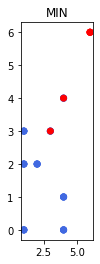

In [16]:
clust_plot(X,2)